In [3]:
!pip install underthesea 
!pip install nltk 
!pip install pyvi

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.9/20.9 MB 42.1 MB/s eta 0:00:0000:0100:01m
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 657.8/657.8 kB 13.7 MB/s eta 0:00:0000:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 29.1 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.5/8.5 MB 64.4 MB/s eta 0:00:00:00:0100:01


In [49]:
import nltk
import pandas as pd
import re
import string
import matplotlib.pyplot as plt
import seaborn as sns
from underthesea import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from collections import Counter
from nltk.util import ngrams
from wordcloud import WordCloud

In [5]:
nltk.download('punkt')
nltk.download('gutenberg')
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('omw-1.4')
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package gutenberg to /usr/share/nltk_data...
[nltk_data]   Package gutenberg is already up-to-date!
[nltk_data] Downloading package wordnet to /usr/share/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /usr/share/nltk_data...
[nltk_data] Downloading package punkt_tab to /usr/share/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [6]:
data = '/kaggle/input/vietnamese-online-news-dataset/news_dataset.json'
df = pd.read_json(data)
df

,id,author,content,picture_count,processed,source,title,topic,url,crawled_at
0,218270,,"Chiều 31/7, Công an tỉnh Thừa Thiên - Huế đã c...",3,0,docbao.vn,"Tên cướp tiệm vàng tại Huế là đại uý công an, ...",Pháp luật,https://docbao.vn/phap-luat/ten-cuop-tiem-vang...,2022-08-01 09:09:22.817308
1,218269,(Nguồn: Sina),"Gần đây, Thứ trưởng Bộ Phát triển Kỹ thuật số,...",1,0,vtc.vn,"Bỏ qua mạng 5G, Nga tiến thẳng từ 4G lên 6G",Sống kết nối,https://vtc.vn/bo-qua-mang-5g-nga-tien-thang-t...,2022-08-01 09:09:21.181469
2,218268,Hồ Sỹ Anh,Kết quả thi tốt nghiệp THPT năm 2022 cho thấy ...,3,0,thanhnien.vn,Địa phương nào đứng đầu cả nước tổng điểm 3 mô...,Giáo dục,https://thanhnien.vn/dia-phuong-nao-dung-dau-c...,2022-08-01 09:09:15.311901
3,218267,Ngọc Ánh,Thống đốc Kentucky Andy Beshear hôm 31/7 cho h...,1,0,vnexpress,Người chết trong mưa lũ 'nghìn năm có một' ở M...,Thế giới,https://vnexpress.net/nguoi-chet-trong-mua-lu-...,2022-08-01 09:09:02.211498
4,218266,HẢI YẾN - MINH LÝ,Vụ tai nạn giao thông liên hoàn trên phố đi bộ...,12,0,soha,"Hải Phòng: Hình ảnh xe ""điên"" gây tai nạn liên...",Thời sự - Xã hội,https://soha.vn/hai-phong-hinh-anh-xe-dien-gay...,2022-08-01 09:09:01.601170
...,...,...,...,...,...,...,...,...,...,...
184534,5,Quốc Thắng,"Chiều 7/6, Khoa bị Công an quận Phú Nhuận phối...",2,1,vnexpress,Nghi can sát hại cha bị bắt,Pháp luật,https://vnexpress.net/nghi-can-sat-hai-cha-bi-...,2022-06-07 14:05:53.848085
184535,4,Thảo Mi,"Ngày 7/6, phiên xử phúc thẩm ông Tất Thành Can...",2,1,vnexpress,Ông Tất Thành Cang được đề nghị giảm án,Pháp luật,https://vnexpress.net/ong-tat-thanh-cang-duoc-...,2022-06-07 14:05:53.482540
184536,3,Thanh Tâm,"""Các khu dân cư của thành phố Severodonetsk đã...",2,1,vnexpress,Nga tuyên bố 'giải phóng' hoàn toàn khu dân cư...,Thế giới,https://vnexpress.net/nga-tuyen-bo-giai-phong-...,2022-06-07 14:05:51.797545
184537,2,Lâm Thỏa,"*Việt Nam - Malaysia: 20h thứ Tư 8/6, trên VnE...",2,1,vnexpress,HLV Malaysia dọa ngáng đường Việt Nam,Thể thao,https://vnexpress.net/hlv-malaysia-doa-ngang-d...,2022-06-07 14:05:51.433712


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 184539 entries, 0 to 184538
Data columns (total 10 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   id             184539 non-null  int64         
 1   author         184539 non-null  object        
 2   content        184539 non-null  object        
 3   picture_count  184539 non-null  int64         
 4   processed      184539 non-null  int64         
 5   source         184534 non-null  object        
 6   title          184539 non-null  object        
 7   topic          184539 non-null  object        
 8   url            184539 non-null  object        
 9   crawled_at     184125 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(3), object(6)
memory usage: 14.1+ MB


All the preprocessing steps in this notebook will be applied for the content column

In [8]:
text = df['content']
text

0         Chiều 31/7, Công an tỉnh Thừa Thiên - Huế đã c...
1         Gần đây, Thứ trưởng Bộ Phát triển Kỹ thuật số,...
2         Kết quả thi tốt nghiệp THPT năm 2022 cho thấy ...
3         Thống đốc Kentucky Andy Beshear hôm 31/7 cho h...
4         Vụ tai nạn giao thông liên hoàn trên phố đi bộ...
                                ...                        
184534    Chiều 7/6, Khoa bị Công an quận Phú Nhuận phối...
184535    Ngày 7/6, phiên xử phúc thẩm ông Tất Thành Can...
184536    "Các khu dân cư của thành phố Severodonetsk đã...
184537    *Việt Nam - Malaysia: 20h thứ Tư 8/6, trên VnE...
184538    Tôi phải lập tức đưa qua nhà cô giáo Ngữ văn l...
Name: content, Length: 184539, dtype: object

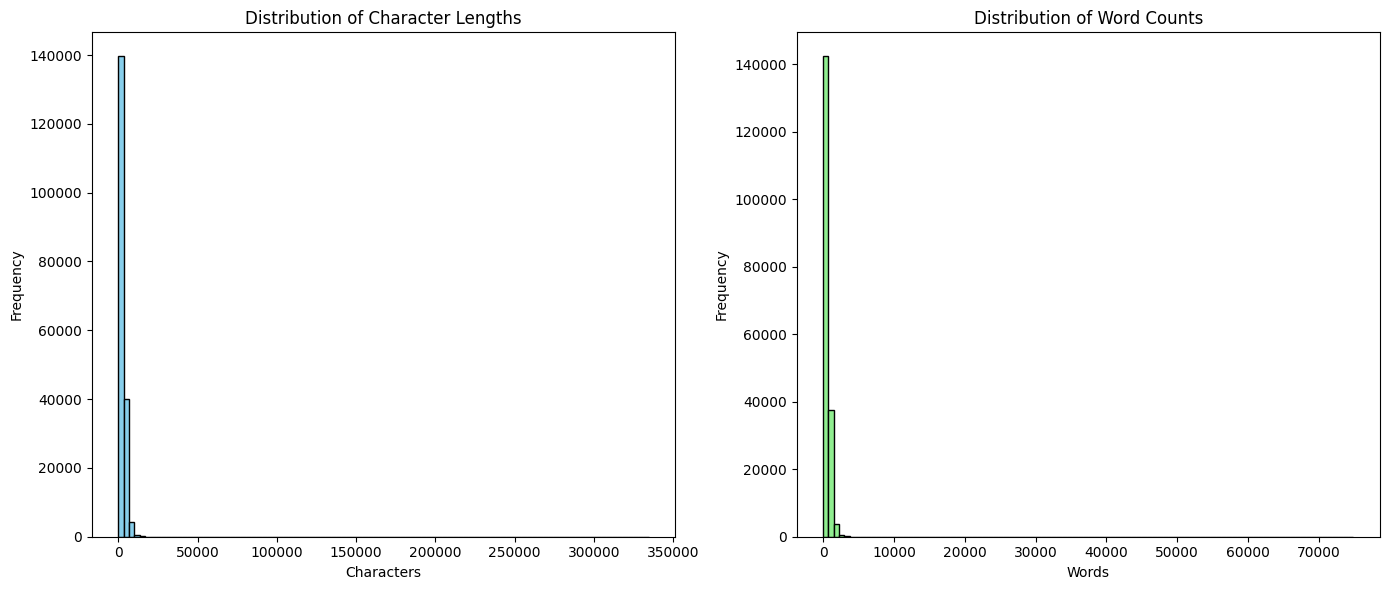

In [9]:
def plot_text_statistics(df):
    char_lengths = df.str.len()
    word_counts = df.str.split().str.len()

    fig, axes = plt.subplots(1, 2, figsize=(14,6))

    # Character length histogram
    axes[0].hist(char_lengths, bins=100, color="skyblue", edgecolor="black")
    axes[0].set_title("Distribution of Character Lengths")
    axes[0].set_xlabel("Characters")
    axes[0].set_ylabel("Frequency")

    # Word count histogram
    axes[1].hist(word_counts, bins=100, color="lightgreen", edgecolor="black")
    axes[1].set_title("Distribution of Word Counts")
    axes[1].set_xlabel("Words")
    axes[1].set_ylabel("Frequency")

    plt.tight_layout()
    plt.show()


plot_text_statistics(text)

In [11]:
word_counts = text.apply(lambda x: len(str(x).split()))
# Average word count
avg = word_counts.mean()
print("Average word count per row:", avg)

Average word count per row: 516.717940381166


The dataset is highly skewed, the majority of them have an average of 516 words per row. 

In [12]:
#Look for tag pattern
def tag_pattern(text): 
    return bool(re.search(r"<[^>]+>", text))

# Filter rows with tag pattern
tags = text[text.apply(tag_pattern)]
for i, row in tags.head(3).items(): 
    print(f"Row {i}: {row}\n")

Row 37:  //<![CDATA[ window.addEventListener("load", function(){if(document.getElementById("left") && document.getElementById("left").offsetWidth < 760){$("#upload_chum_anh_1659255744").justifiedGallery({rowHeight: 299,lastRow: "justify",margins: 3,captions:false});window["myLazyLoad"].update();}else{$("#upload_chum_anh_1659255744").justifiedGallery({rowHeight: 324,lastRow: "justify",margins: 3,captions:false});window["myLazyLoad"].update();}}); //]]> Á hậu Phương Anh, hoa hậu Tiểu Vy trong trang phục váy cưới. Top 37 Miss World Vietnam 2022 đã cùng trình diễn 2 BST với hai màu sắc đối lập của NTK Lê Thanh Hòa và NTK Đỗ Long tại Vietnam Beauty Fashion Fest. Mặc điều kiện thời tiết khó khăn, các thí sinh vẫn thể hiện sự chuyên nghiệp và hoàn thành phần catwalk trên sàn runway dài 300m. Nối tiếp chuỗi sự kiện đậm chất mùa hè miền nhiệt đới trong khuôn khổ vòng Chung kết Miss World Vietnam 2022, show thời trang Vietnam Beauty Fashion Fest đã được diễn ra với rất nhiều những điều mới lạ dư

Other than URLs, some rows have code embedded in. 

In [13]:
def has_javascript(text):
    if text is None:
        return False
    text = str(text).lower()
    return bool(re.search(r"(//<!\[cdata\[.*?//\]\]>)|(//\s*window\.)", text, flags=re.DOTALL))

mask = text.apply(has_javascript)
print("Rows with JavaScript-like code:", mask.sum())

Rows with JavaScript-like code: 258


# **1. Text Preprocessing**

In [16]:
#Lowercase text
text = text.str.lower()

In [17]:
#Remove external code
text = text.apply(lambda x: re.sub(r"(//<!\[cdata\[.*?//\]\]>)|(//\s*window\..*)", "", str(x),flags=re.DOTALL | re.IGNORECASE))

In [18]:
#Remove url
text = text.apply(lambda x: re.sub(r"http\S+|https\S+|www\S+", "", str(x)))

In [19]:
#Remove numbers except for valid year
text = text.apply(lambda x: re.sub(r"\b(?!19\d{2}\b|20\d{2}\b)\d+\b", "", str(x)))

In [20]:
#Clean whitespace
text = text.str.replace(r'\s+', ' ', regex=True).str.strip()

Since the dataset is huge which can cause the tokenization process takes hours long, I will split up to 1000 rows into a string and tokenize. 

In [21]:
#Take the first 1000 rows into a corpus 
rows = 1000
corpus = text[:rows].str.cat(sep='.')  
print(f"Total characters in corpus: {len(corpus)}")

Total characters in corpus: 2263607


In [22]:
#Tokenize the corpus 
tokens = word_tokenize(corpus, format='list')

In [23]:
#Remove punctuation
tokens = [w for w in tokens if (w.isalpha() or re.fullmatch(r"(19\d{2}|20\d{2})", w))]

In [24]:
with open("/kaggle/input/stop-words-in-28-languages/vietnamese.txt", "r", encoding="utf-8") as f:
    stopwords = [stopwords.strip() for stopwords in f]

print(stopwords[:5])

['a lô', 'a ha', 'ai', 'ai ai', 'ai nấy']


In [25]:
#Remove stop words 
stopwords = set(stopwords)
cleaned_corpus = [w for w in tokens if w not in stopwords]

In [26]:
cleaned_corpus[:20]

['chiều',
 'tỉnh',
 'huế',
 'vụ',
 'cướp',
 'tiệm',
 'vàng',
 'chợ',
 'đông',
 'nằm',
 'đường',
 'tp',
 'huế',
 'tỉnh',
 'huế',
 'gòn',
 'súng',
 'ak',
 'xông',
 'tiệm']

# **2. Feature Extraction**

**a. Bag of words**

In [30]:
#Count word frequency 
wordcount = {}
for data in cleaned_corpus: 
    if data in wordcount: 
        wordcount[data] += 1  
    else: 
        wordcount[data] = 1 

freq_df = pd.DataFrame(list(wordcount.items()), columns=['Word', 'Frequency'])
freq_df = freq_df.sort_values(ascending=False, by='Frequency')
freq_df

,Word,Frequency
18,đi,814
347,đồng,794
1,tỉnh,649
198,giá,636
87,2022,580
...,...,...
4274,mapping,1
4273,cartographic,1
2805,ptdt,1
1579,dazzling,1


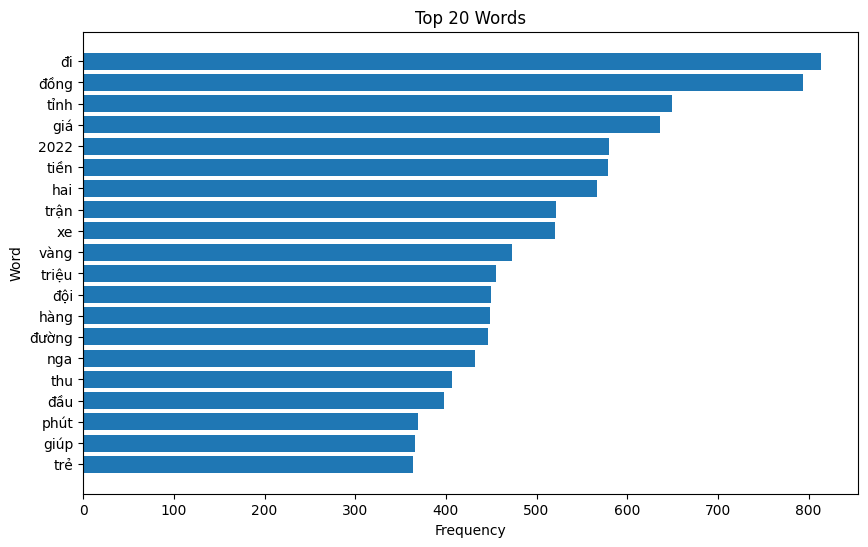

In [44]:
#Bar chart for word frequency
top_df = freq_df.head(20)
plt.figure(figsize=(10,6))
plt.barh(top_df['Word'], top_df['Frequency'])
plt.gca().invert_yaxis()  
plt.xlabel("Frequency")
plt.ylabel("Word")
plt.title(f"Top 20 Words")
plt.show()

In [33]:
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(cleaned_corpus)
print("Vocabulary:", vectorizer.get_feature_names_out())
# Print the Bag-of-Words matrix
print("BoW Representation:")
print(X.toarray())

Vocabulary: ['1900' '1908' '1910' ... 'ủy' 'ức' 'ửng']
BoW Representation:
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


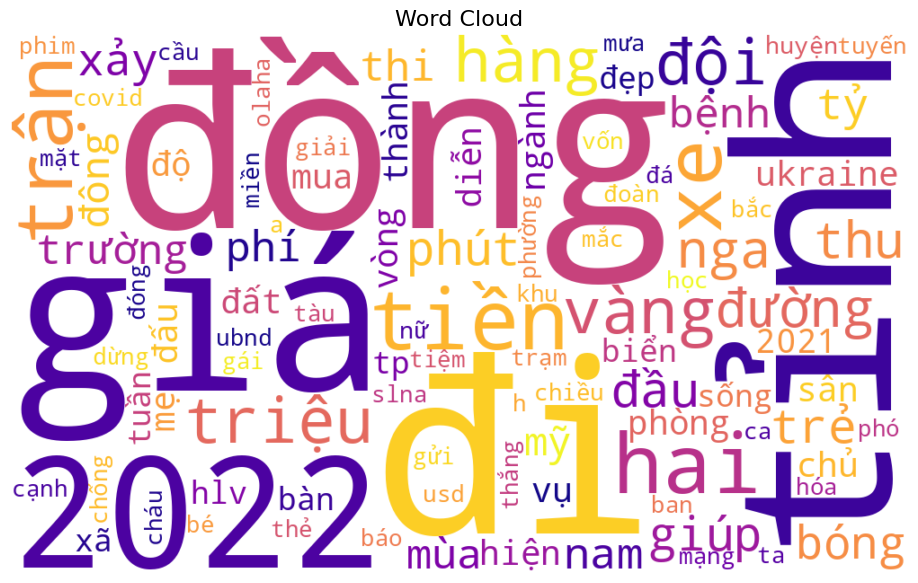

In [53]:
#Word Cloud 
word_freq = dict(zip(freq_df['Word'], freq_df['Frequency']))
wordcloud = WordCloud(width=1000, height=600,
                      background_color="white",
                      colormap="plasma",
                      max_words=100).generate_from_frequencies(word_freq)

plt.figure(figsize=(12, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Word Cloud", fontsize=16)
plt.show()

**b. TF-IDF**

In [36]:
tfidf_vectorizer = TfidfVectorizer()
X_tfidf = tfidf_vectorizer.fit_transform(cleaned_corpus)
# Show the TF-IDF Matrix
print("TF-IDF Representation:")
print(X_tfidf.toarray())

TF-IDF Representation:
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


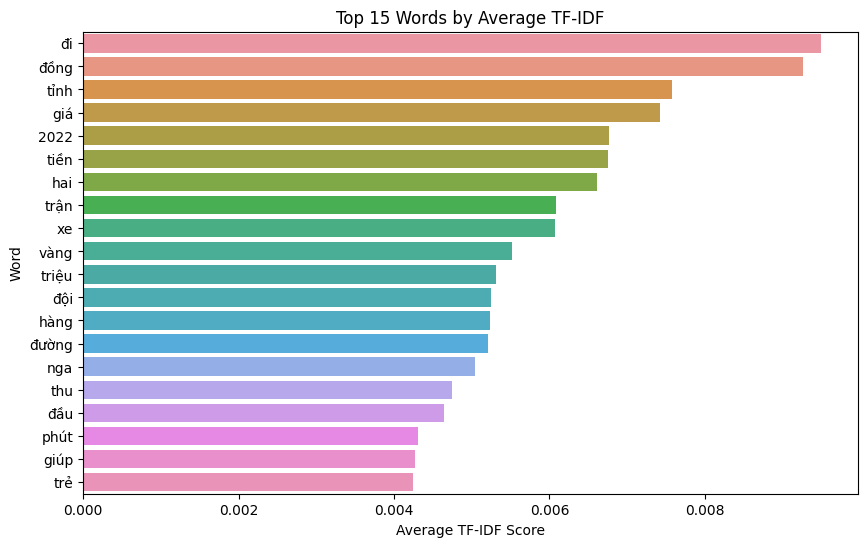

In [48]:
#Bar chart by TF-IDF
tfidf_df = pd.DataFrame(X_tfidf.toarray(),columns=tfidf_vectorizer.get_feature_names_out())
avg_tfidf = tfidf_df.mean().sort_values(ascending=False).head(20)
plt.figure(figsize=(10,6))
sns.barplot(x=avg_tfidf.values, y=avg_tfidf.index)
plt.title("Top 15 Words by Average TF-IDF")
plt.xlabel("Average TF-IDF Score")
plt.ylabel("Word")
plt.show()

**c. N-gram (bigrams and trigrams)**

In [41]:
# Count bigrams and trigrams
bigram_counts = Counter(ngrams(cleaned_corpus, 2))
trigram_counts = Counter(ngrams(cleaned_corpus, 3))

print("Top 5 bigrams:", bigram_counts.most_common(5))
print("Top 5 trigrams:", trigram_counts.most_common(5))

Top 5 bigrams: [(('thu', 'phí'), 273), (('tỷ', 'đồng'), 221), (('trận', 'đấu'), 220), (('triệu', 'đồng'), 215), (('tiệm', 'vàng'), 131)]
Top 5 trigrams: [(('trạm', 'thu', 'phí'), 81), (('thu', 'phí', 'dừng'), 76), (('đậu', 'mùa', 'khỉ'), 74), (('p', 'n', 'a'), 48), (('xảy', 'lốc', 'sét'), 47)]


In [58]:
top_bigrams = bigram_counts.most_common(10)
top_trigrams = trigram_counts.most_common(10)

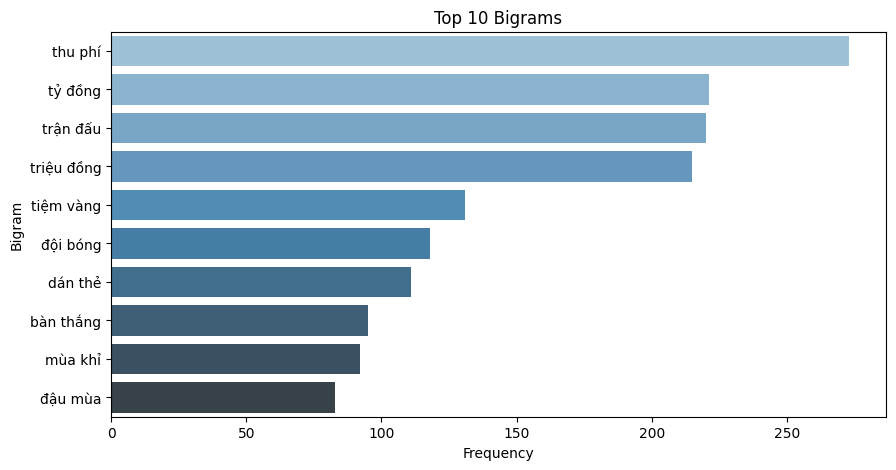

In [56]:
#Bar chart for bigrams
bigram_df = pd.DataFrame(top_bigrams, columns=["Bigram", "Frequency"])
bigram_df["Bigram"] = bigram_df["Bigram"].apply(lambda x: " ".join(x))

plt.figure(figsize=(10,5))
sns.barplot(x="Frequency", y="Bigram", data=bigram_df, palette="Blues_d")
plt.title("Top 10 Bigrams")
plt.xlabel("Frequency")
plt.ylabel("Bigram")
plt.show()


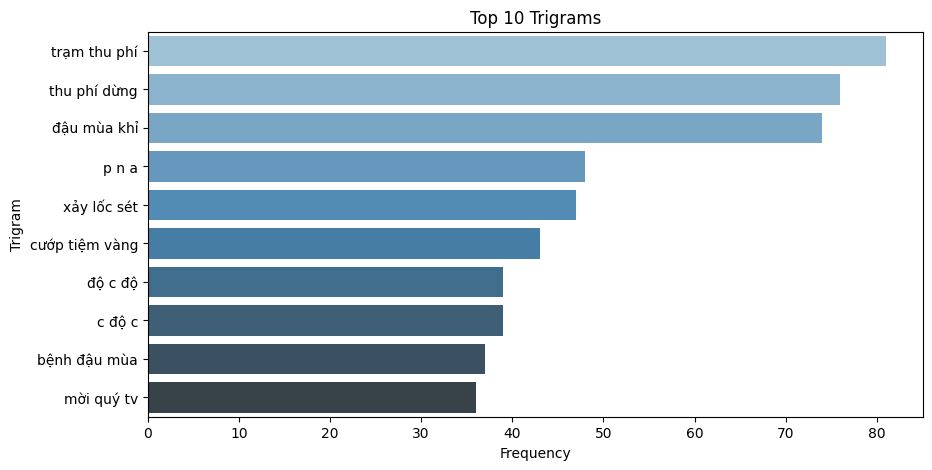

In [60]:
#Bar chart for trigrams
trigram_df = pd.DataFrame(top_trigrams, columns=["Trigram", "Frequency"])
trigram_df["Trigram"] = trigram_df["Trigram"].apply(lambda x: " ".join(x))

plt.figure(figsize=(10,5))
sns.barplot(x="Frequency", y="Trigram", data=trigram_df, palette="Blues_d")
plt.title("Top 10 Trigrams")
plt.xlabel("Frequency")
plt.ylabel("Trigram")
plt.show()
